[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


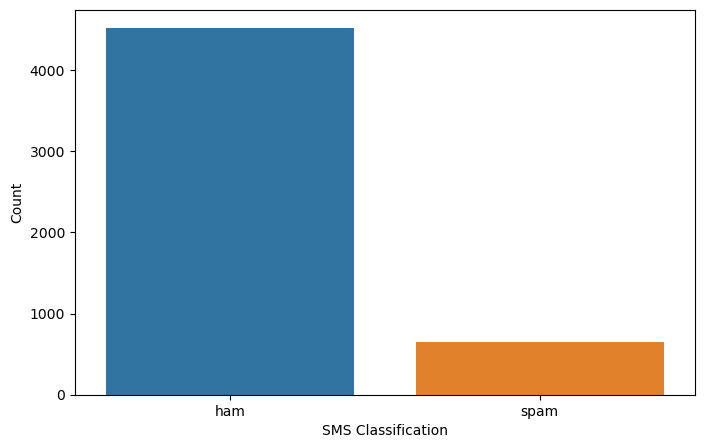

Test accuracy: 97.78%
This is spam!
This is a normal message.
This is spam!


In [28]:
import pandas as pd
import string
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import os

# Download NLTK stopwords
nltk.download('stopwords')

# Load dataset
data_file = 'SMSSpamCollection.txt'  # Ensure this file exists in the correct path
sms = pd.read_csv(data_file, sep='\t', names=['label', 'message'])

# Drop duplicates and reset index
sms.drop_duplicates(inplace=True)
sms.reset_index(drop=True)

# Plot distribution of spam/ham
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=sms)
plt.xlabel('SMS Classification')
plt.ylabel('Count')
plt.show()

# Corpus and PorterStemmer
corpus = []
ps = PorterStemmer()

# Ensure index reset before processing
sms.reset_index(drop=True, inplace=True)

# Pre-process SMS messages
try:
    for i in range(sms.shape[0]):
        message = re.sub('[^a-zA-Z]', ' ', sms['message'][i])  # Remove non-alphabets
        message = message.lower()  # Convert to lowercase
        words = message.split()  # Tokenize
        words = [word for word in words if word not in set(stopwords.words('english'))]  # Remove stopwords
        words = [ps.stem(word) for word in words]  # Stem words
        corpus.append(' '.join(words))
except KeyError as e:
    print(f"KeyError encountered at index {i}: {e}")

# Vectorize corpus
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

# Correctly map spam to 1 and ham to 0
y = (sms['label'] == 'spam').astype(int)

# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train Naive Bayes classifier
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Test accuracy: {accuracy * 100:.2f}%")

# Define spam prediction function
def predict_spam(message):
    processed_message = re.sub('[^a-zA-Z]', ' ', message).lower()
    words = processed_message.split()
    words = [ps.stem(word) for word in words if word not in set(stopwords.words('english'))]
    transformed_message = cv.transform([' '.join(words)]).toarray()
    return classifier.predict(transformed_message)[0]

# Test spam prediction
test_message = "Get your free credit card now! No credit check required. Click here."
result = ['This is a normal message.', 'This is spam!']

if predict_spam(test_message):
    print(result[1])
else:
    print(result[0])
    
msg = "[Update] Congratulations Nile Yogesh, You account is activated for investment in Stocks. Click to invest now: "

if predict_spam(msg):
    print(result[0])
else:
    print(result[1])

msg = "Your Stock broker FALANA BROKING LIMITED reported your fund balance Rs.1500.5 & securities balance 0.0 as on end of MAY-20 . Balances do not cover your bank, DP & PMS balance with broking entity. Check details at YOGESHNILE.WORK4U@GMAIL.COM. If email Id not correct, kindly update with your broker."

if predict_spam(msg):
    print(result[0])
else:
    print(result[1])
